目次
--------------------------------------------
第3章 Pandasでデータ分析
--------------------------------------------

    3-1 Pandasとは
    3-2 Pandas - Seriesの基本
    3-3 Pandas - DataFrameの基本
    3-4 Pandas - DataFrameへのインデックス設定
    3-5 Pandas - DataFrameのソート
    3-6 Pandas - DataFrameの参照(単一インデックス)
    3-7 Pandas - DataFrameの参照(階層型インデックス)
    3-8 Pandas - DataFrameから条件指定でのデータ抽出
    3-9 Pandas - Excel、CSVファイルの読み込み、書き込み
    3-10 Pandas - DataFrameの結合(Union)
    3-11 Pandas - DataFrameの結合(Join)
    3-12 Pandas - ピボットテーブルの作成
    3-13 Pandas - 時系列データの取り扱い

3-1 Pandasとは
--------------------------------------------

Pandas(パンダス)とはデータを効率的に扱うために開発されたPythonライブラリの１つでNumPyを使いやすく拡張したライブラリになります。

このライブラリもデータ分析、機械学習、ディープラーニングには必要不可欠なものになります。

NumPyがベクトルや行列などの数値計算に特化している一方でPandasは数値だけではなく文字列などの様々なデータ型を扱うことができます。

NumPyとの使い分けとしては機械学習やディープラーニングなどの大量の数値データを高速に扱う処理はNumPyを利用しデータの取り込みや加工、集計処理、数値以外のデータの処理などはPandasで実施します。

Pandasでは次のような処理をすることができます。

・CSVやExcelファイルなどの様々な形式のファイルからのデータ取り込み、書き込み

・インデックスの設定とインデックスを指定してのデータ検索

・Excelのピボットテーブルのようなクロス集計

・データ同士の結合、グループ化

・時系列データの処理

・簡単なグラフ化

またPandasには２つの主要なデータ構造がありSeries(シリーズ)が一次元のデータ、DataFrame(データフレーム)が２次元のデータに対応します。

Pandasを利用するには事前に以下のimport文を記述しPandasのライブラリを読み込んでおく必要があります。

またas pdとすることで、それ以降のプログラムの中でpdという名前で利用できるようにします。

リスト型のSeries（１次元）でインデックスを指定しない場合に自動付与します。

3-2 Pandas - Seriesの基本
--------------------------------------------

先ほども述べましたがPandasには２つの主要なデータ構造がありSeriesが１次元のデータ、DataFrameが２次元のデータに対応します。

Seriesは1次元のデータを保持しますのでDataFrameの1行や１列の情報もSeriesに対応します。

実務で利用するデータはMatplotlibの例で出てきた温度とアイスクリームの売上など2つの軸で表される２次元のデータが多いのでDataFrameの方を利用することの方が多いですがSeriesはDataFrameの構成要素となるのでその性質を知っておく方が良いでしょう。

それではまずはSeriesをみていきましょう。

SeriesはNumPyの配列に似ていますがインデックスを使ってデータに名前をつけることができる点が異なります。

またそのインデックスを指定してSeriesに格納したデータを取り出すことができます。

さらにSeriesは数値だけでなく文字列など様々なオブジェクトを格納することができます。

Seriesの作成方法
--------------------------------------------

Seriesはリスト、ディクショナリ、NumPyのndarrayなどから作成することができます。

Seriesは次のように定義します。

pd.Series(data=データの配列, index=インデックスの配列)

まずはリストをもとにSeriesを作成してみましょう。

リストlist1に数値「12, 24, 36」を格納しpd.Seriesの引数dataにlist1を渡します。

In [1]:
import pandas as pd

import numpy as np


list1 = [12, 24, 36]

pd.Series(data = list1)

0    12
1    24
2    36
dtype: int64

すると１列目に0, 1, 2、２列目に12, 24, 36、最後に「dtype: int64」と表示されました。

１列目に表示された0, 1, 2という数値がインデックスでpd.Seriesの引数indexに何も渡さないとデフォルトでは連番の数値が設定されます。

２列目に表示された12, 24, 36が先ほど格納したリストlist1の値になります。このようにSeriesではインデックス付きでデータが格納されます。

後ほど説明しますがデータを取り出す際にこのインデックスを指定して取り出すことができます。

また最後に表示された「dtype: int64」はSeriesに格納されたデータの型になります。

先ほどはインデックスを指定しませんでしたが次はSeries作成時にindexを設定してみましょう。

リストindex1にインデックス["Row1", "Row2", "Row3"]を格納し、pd.Seriesの引数indexにリストindex1を渡します。

In [2]:
index1 = ["Row1", "Row2", "Row3"]

pd.Series(data =  list1, index = index1)

Row1    12
Row2    24
Row3    36
dtype: int64

In [3]:
dict1 = dict(Row1 = 11, Row2 = 22, Row3 = 33)

pd.Series(data = dict1)

Row1    11
Row2    22
Row3    33
dtype: int64

さらにはNumpyで作成したndarrayからもSeriesを作成することができます。
その場合、インデックスは必要に応じて別途設定する必要があります。

In [4]:
import numpy as np

arr1 = np.array([11, 22, 33])

pd.Series(data = arr1, index = index1)

Row1    11
Row2    22
Row3    33
dtype: int64

またSeriesには、先ほどの例のように整数だけでなく、文字列など様々なデータ型のオブジェクトを格納することができます。
それでは文字列"apple", "strawberry", "chery"を格納してみましょう。
インデックスは、先ほど定義したリストindex1を利用します。

In [5]:
pd.Series(data = ["apple", "strawberry", "cherry" ], index = index1)

Row1         apple
Row2    strawberry
Row3        cherry
dtype: object

さらに数値だけ、文字列だけというように１種類のデータ型だけではなく、様々なデータ型のオブジェクトを混同して格納することもできます。
それでは文字列"apple",整数300, ブール(True/False)のTrueを格納してみましょう。
インデックスは、先ほど定義したリストindex1を利用します。

In [6]:
pd.Series(data = ["apple", 300, True], index = index1)

Row1    apple
Row2      300
Row3     True
dtype: object

Seriesからデータの取得
--------------------------------------------

Seriesに格納したデータは、インデックスを指定して値を取得します。
リストをもとに作成したSeriesを変数ser1に格納します。
Seriesには先ほどと同様、1行目から順にRow1、Row2、Row3とインデックスが設定されています。
そしてSeriesに対してインデックス"Row2"を指定して２行目の値「2」を取得してみましょう。

In [7]:
list1 = [1, 2, 3]

index1 = ["Row1", "Row2", "Row3"]

ser1 = pd.Series(data = list1, index = index1)

ser1["Row2"]

2

またSeriesへ格納されたデータは条件を指定して取得することもできます。
先ほど定義したser1を使って確認してみましょう。
Seriesに対して条件を指定すると、格納された値と条件を照らし合わせて、結果としてTrue/Falseが返ってきます。

例えばser1に格納された値で2以上のものという条件を指定すると、次のように各値と条件を比較した結果がTrue/Falseとして表示されます。

In [8]:
ser1 >= 2

Row1    False
Row2     True
Row3     True
dtype: bool

SeriesではTrueのデータのみを表示するので、この性質を利用し、次のようにして、条件を満たしたデータを抽出することができます。
2以上となるRow2、Row3値が表示されました。

In [9]:
ser1[ser1 >= 2]

Row2    2
Row3    3
dtype: int64

Seriesへのデータの追加・削除
--------------------------------------------

次にSeriesへデータを追加します。Seriesへのデータの追加は、インデックスを指定して値を代入します。
さきほどのser1に対して、インデックス"Row4"で値4を、インデックス"Row5"で値5を追加してみましょう。次のように記述します。

In [10]:
ser1["Row4"] = 4

ser1["Row5"] = 5

ser1

Row1    1
Row2    2
Row3    3
Row4    4
Row5    5
dtype: int64

今度はSeriwsのデータを削除します。削除する場合は次のようにdropを利用します。引数には削除したい要素のインデックスを渡します。

Series.drop(インデックス)

先ほど追加したインデックス"Row5"の要素を削除します。

In [11]:
ser1.drop("Row5")

Row1    1
Row2    2
Row3    3
Row4    4
dtype: int64

インデックスを利用した演算
--------------------------------------------

複数のSeriesがある場合、インデックスのが同じものについてはそのまま演算をすることができます。
例えば2つのSeries"ser2"と"ser3"で同じインデックス"R1"の要素があった場合、ser2　+ ser3 と足算すると、インデックス"R1"同士の要素を足してくれます。

ここではSeries"ser2"のインデックス"R1"の値は1、一方でSeries"ser3"のインデックス"R1"の値は10なので、ser2 + ser3 = 1 + 10 = 11となっています。

その他の要素も同様に計算されていることがわかります。

In [12]:
list2 = [1, 2, 3, 4, 5]

list3 = [10, 20, 30, 40, 50]

index2 = ["R1", "R2", "R3", "R4", "R5"]

ser2 = pd.Series(data = list2, index = index2)

ser3 = pd.Series(data = list3, index = index2)

ser2 + ser3

R1    11
R2    22
R3    33
R4    44
R5    55
dtype: int64

3-3 Pandas - DataFrameの基本
--------------------------------------------

次に2次元のデータを扱うDataFrame(データフレーム)をみていきましょう。
Seriesと同様にインデックスを持ちますが、2次元のデータなので、行と列で表現され、複数の行と列が存在します。

DataFrameの作成方法
--------------------------------------------

DataFrameもSeriesと同様に、リスト、ディクショナリ、NumPyのndarrayなどから作成することができます。
DataFrameは次のように定義します。

pd.DataFrame(data = データの配列, index = インデックスの配列, columns = 列名の配列)

まず初めにリストをもとにDataFrameを作成していきましょう。

リストlist1に3つの文字列"a1", "a2", "a3"を格納し、pd.DataFrameの引数dataにlist1を渡します。

In [13]:
list1 = ["a1", "a2", "a3"]

pd.DataFrame(data = list1)

,0
0,a1
1,a2
2,a3


実行した結果いちばん上に0という数値とその下に横線が、その下には1列目に0, 1, 2、２列目にa1, a2, a3が表示されています。

まず横線以下に表示されている1列目の数値0, 1, 2はインデックスで、引数indexに何も渡さないとデフォルトでは0から始まる連番の数値が上の行から順に設定されます。

2列目には、引数dataに渡したリストlist1の値a1, a2, a3が表示されています。
Seriesと同様DataFrameでも、それぞれの行に対応するインデックスが付く形でデータが格納されています。

このインデックスを指定することで、指定した行のデータを取り出すことができます。詳細は後述いたしますが、例えばインデックス0を指定すると、対応する行のデータa1を取得でき、インデックス2を指定すると、対応する行のデータa3を取得できます。

またいちばん上に表示されている0は列名で、その下のa1, a2, a3に対応する列の名称を表しています。
こちらもインデックスと同様、引数columnsに何も渡さないと、デフォルトでは0から始まる連番の数値が左から順に設定されます。

今度はインデックスや列名を指定してDataFrameを作成してみましょう。

まずはリストlist1に3行3列のリスト[[1, 2, 3], [21,22, 23], [31, 32, 33]]を格納しpd.DataFrameの引数dataにリストlist2を設定します。

次にリストindex1にインデックス["Row1", "Row2", "Row3"]を格納し、引数indexにリストindex1を渡します。

また、リストcolumns1に列名["Col1", "Col2", "Col3"]を格納し、引数columnsにリストcolumn1を渡します。

In [14]:
list1 = [[1, 2, 3], [21, 22, 23], [31, 32 ,33]]

index1 = ["Row1", "Row2", "Row3"]

columns1 = ["Col1", "Col2", "Col3"]

pd.DataFrame(data = list1, index = index1, columns = columns1)

,Col1,Col2,Col3
Row1,1,2,3
Row2,21,22,23
Row3,31,32,33


このようにインデックス、列名を指定すると、今回は連番はなく1行目から順にRow1、Row2、Row3と指定したインデックスが設定され、また列名も1列目から順にCol1、Col2、Col3と設定されました。

次にNumPyで作成したndarrayからDataFrameを作成してみましょう。
インデックス、列名には先ほどの例と同じものを使います。

In [15]:
import numpy as np

arr1 = np.array([[1, 2, 3], [21, 22, 23], [31, 32, 33]])

pd.DataFrame(data = arr1, index = index1, columns = columns1)

,Col1,Col2,Col3
Row1,1,2,3
Row2,21,22,23
Row3,31,32,33


そしてディクショナリからDataFrameを作成する例も確認していきましょう。
ディクショナリのキーと合わせて、列単位でデータを設定していく形となります。そしてキーRow1、Row2、Row3が列名として設定されています。

In [16]:
dict1 = dict(Row1 = [1, 21, 31], Row2 = [2, 22, 32], Row3 = [3, 23, 33])
pd.DataFrame(data = dict1)

,Row1,Row2,Row3
0,1,2,3
1,21,22,23
2,31,32,33


またSeriesと同様DataFrameも文字列、整数だけでなく、様々なデータ型のオブジェクトを複数合わせて格納することができます。

In [17]:
list2 = [["P001", "iPhone 8 64GB", 85000],
        ["P002", "iPhone X 256GB", 130000],
        ["P003", "iPhone SE 32 GB", 37000]]

columns2 = ["Product ID", "Product Name", "Price (JPY)"]

pd.DataFrame(data = list2, columns = columns2)

,Product ID,Product Name,Price (JPY)
0,P001,iPhone 8 64GB,85000
1,P002,iPhone X 256GB,130000
2,P003,iPhone SE 32 GB,37000


DataFrameへのデータの追加・削除
--------------------------------------------

DataFrameにデータを追加するには、追加したいデータのDataFrameを作成し、既存のDataFrameに対してappendを利用して追加します。

appendは次のように記述します。
引数ignore_indexはTrueを渡した場合、設定してあるインデックスは使われずに、新たに0空番号が再設定されます。

Falseを渡した場合、前のインデックスが変更されずに残ります。引数ignore_indexを省略するとFalseになります。

既存のDataFrame.append(追加するDataFrame, ignore_index = True/False)

まずは既存のDataFrameに該当するdf1を用意します。

In [18]:
list2 = [["P001", "iPhone 8 64 GB", 85000],
            ["P002", "iPhone X 256 GB", 130000],
            ["P003", "iPhone SE 32 GB", 27000]]

columns2 = ["Product ID", "Product Name", "Price (JPY)"]
    
df1 = pd.DataFrame(data = list2, columns = columns2)
    
df1

,Product ID,Product Name,Price (JPY)
0,P001,iPhone 8 64 GB,85000
1,P002,iPhone X 256 GB,130000
2,P003,iPhone SE 32 GB,27000


次に追加するDataFrameを定義します。列名は同じですので先ほど定義したリストcolumns2を使います。

In [19]:
df2 = pd.DataFrame(data = [["P004", "iPhone 7 32 GB", 10000]], columns = columns2)
df2

,Product ID,Product Name,Price (JPY)
0,P004,iPhone 7 32 GB,10000


最後に既存のDataFrameであるdf1に対してappendを利用しdf2を追加します。
ignore_indexはTrueに対してインデックスの番号を振りなおします。（参考までにFalaseにするとインデックスの番号はそのまま残り、上から順に0、1、2、0となります。)

In [20]:
df1 = df1.append(df2, ignore_index = True)

df1

,Product ID,Product Name,Price (JPY)
0,P001,iPhone 8 64 GB,85000
1,P002,iPhone X 256 GB,130000
2,P003,iPhone SE 32 GB,27000
3,P004,iPhone 7 32 GB,10000


このようにしてDataFrameに対してデータを追加することができました。

今度は列を追加してみましょう。列の追加は次のようにDataFrameに対して列名を指定して、対象の列の情報をリストで渡します。

In [21]:
df1["Screen Size (in.)"] =  [4.7, 5.8, 4, 4.7]

df1

,Product ID,Product Name,Price (JPY),Screen Size (in.)
0,P001,iPhone 8 64 GB,85000,4.7
1,P002,iPhone X 256 GB,130000,5.8
2,P003,iPhone SE 32 GB,27000,4.0
3,P004,iPhone 7 32 GB,10000,4.7


次にDataFrameからのデータの削除方法をみていきましょう。
削除はdropを利用し、引数には削除したい要素のインデックスを渡します。
そのほかにもよく利用する引数がありますが、この後に紹介します。

DataFrame.drop(インデックス)

先ほど作成したDataFrameのdf1からインデックス2の行を削除します。

In [22]:
df1.drop(2)

,Product ID,Product Name,Price (JPY),Screen Size (in.)
0,P001,iPhone 8 64 GB,85000,4.7
1,P002,iPhone X 256 GB,130000,5.8
3,P004,iPhone 7 32 GB,10000,4.7


dropに削除したい行のインデックス2を設定し実行すると、該当行が削除されました。
ただしこのままではもう一度df1の内容を確認すると、先ほど削除した行が復活しています。

In [23]:
df1

,Product ID,Product Name,Price (JPY),Screen Size (in.)
0,P001,iPhone 8 64 GB,85000,4.7
1,P002,iPhone X 256 GB,130000,5.8
2,P003,iPhone SE 32 GB,27000,4.0
3,P004,iPhone 7 32 GB,10000,4.7


削除の実行結果をdf1に保存するにはdropには引数inplaceというものがありinplaceに対してTrueを渡してあげる必要があります。
何も指定しなければFalseとなり、先ほどのように実行結果が保存されません。

それでは引数inplaceにTrueを渡して再実行します。
今回はdf1からインデックス2、3の複数の行を削除してみましょう。
複数の行を指定する場合、インデックスをリストで指定します。この場合は[2, 3]を指定します。

In [24]:
df1.drop([2, 3], inplace = True)

df1

,Product ID,Product Name,Price (JPY),Screen Size (in.)
0,P001,iPhone 8 64 GB,85000,4.7
1,P002,iPhone X 256 GB,130000,5.8


引数inplaceにTrueを指定してdropを実行した後DataFrameの中身を確認すると、削除した結果が保存されていることがわかりました。

DataFrameは行と列とで表されるので、行だけではなく、列を削除したい場合も出てきます。そのような場合にはどのようにすればいいのでしょうか。

列を削除する場合はdropの引数axisで1(列)を指定します。
何もなければ0(行)を指定したことになります。

それでは、列"Screen Size(in.)"を削除してみましょう。
この場合はdropにはインデックスの代わりに列名"Screen Size(in.)"を渡し、また引数axisに1を指定します。

In [25]:
df1.drop("Screen Size (in.)", axis = 1, inplace = True)

df1

,Product ID,Product Name,Price (JPY)
0,P001,iPhone 8 64 GB,85000
1,P002,iPhone X 256 GB,130000


列"Screen Size (in.)"が削除されました。

3-4 Pandas - DataFrameへのインデックス設定
--------------------------------------------

DataFrameにある列の中から、特定の列をインデックスに指定することもできます。各行の情報をユニークに指定できる列をインデックスに指定することで、インデックスを指定しれ情報を取り出しやすくすることができます。


また後ほどの章で説明しますが、設定したインデックスをもとに先に学んだスライシングを用いて検索することもできます。

インデックスは一度設定すると変更できませんので、変更が発生しない列に設定すべきです。(ただし設定したインデックスを外して再度設定し直すことは可能です。)

インデックスの設定
--------------------------------------------

インデックスの設定にはset_indexを使います。

DataFrame.set_index(インデックスに指定する列名, inplace = True/False)

inplaceにTrueを渡すとインデックス設定の実行結果がDataFrameに保存され、何も指定しなければFalseとなりDataFrameには実行結果が保存されません。

次のような商品のマスタの情報を格納するDataFrame df1に対して、インデックスを設定してみましょう。

In [26]:
list1 = [["P001", "iPhone 8 64 GB", 85000],
        ["P002", "iPhone X 256 GB", 130000],
        ["P003", "iPhone SE 32 GB", 37000]]
        
columns1 = ["Product ID", "Product Name", "Price (JPY)"]

df1 = pd.DataFrame(data = list1, columns = columns1)

df1

,Product ID,Product Name,Price (JPY)
0,P001,iPhone 8 64 GB,85000
1,P002,iPhone X 256 GB,130000
2,P003,iPhone SE 32 GB,37000


ここではdf1に対してインデックスは0、1、2と連番になっています。
このような連番では後々インデックスを指定して行の方法を取得したい場合、思い出すことができずにその都度インデックスを調べるかインデックスを使わずに別の方法で検索することになり不便です。

この商品のマスタの行をユニークに識別する列は"Priduct ID"になりますので"Product ID"をインデックスに設定しましょう。

引数inplaceにはTrueを指定して、設定したインデックスをDataFrameに保存します。(Falseを指定して保存しなければ次にdf1を確認するとインデックスが連番に戻っています。)

階層型インデックスの設定
--------------------------------------------

またインデックスは1つの列だけでなく、複数の列に対して設定することもできます。
これを階層型インデックスと言います。

次のような売上伝票の明細データの場合"Sales_No", "Sales_Item_No"の2つの列が行を特定する列になりますので、インデックスとしてこれら2つの列を設定することになります。

In [27]:
df_sales_item = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/T_Sales_Item.csv")

df_sales_item.head(6)

,Sales_No,Sales_Item_No,Product_ID,Qty,Amount,Tax
0,A001,1,P001,1,7000,560
1,A001,2,P002,2,7700,616
2,A002,1,P003,1,6800,544
3,A002,2,P006,4,35000,2800
4,A003,1,P005,3,30000,2400
5,A004,1,P002,5,7700,616


df_sales_itemではインデックスは連番になっています。

それではインデックスを変更して2つの列"Sales_No", "Sales_Item_No"をインデックスに設定しましょう。

set_indexに対して2つの列をリストで渡します。

In [28]:
df_sales_item.set_index(["Sales_No", "Sales_Item_No"], inplace = True)

df_sales_item.head(6)

Product_ID  Qty  Amount   Tax
Sales_No Sales_Item_No                              
A001     1                   P001    1    7000   560
         2                   P002    2    7700   616
A002     1                   P003    1    6800   544
         2                   P006    4   35000  2800
A003     1                   P005    3   30000  2400
A004     1                   P002    5    7700   616

インデックスの解除
--------------------------------------------

インデックスの解除はreset_indexを使用します。
インデックスの解除によりインデックスは連番に戻ります。
inplaceは指定しなければFalseになり、インデックスうの解除がDataFrameに保存されません。

DataFrame.reset_index(inplace = True/False)

reset_indexはインデックスを変更したい場合にも利用されます。
一度設定したインデックスは直接変更できません。
set_indexで設定したインデックスが間違っていた場合reset_indexで一度解除してから再びset_indexで正しいインデックスに設定しなおします。

先ほどインデックスに"Sales_No", "Sales_Item_No"を指定したDataFrame df_sales_itemのインデックスを解除します。

In [29]:
df_sales_item.reset_index(inplace = True)

df_sales_item.head(6)

,Sales_No,Sales_Item_No,Product_ID,Qty,Amount,Tax
0,A001,1,P001,1,7000,560
1,A001,2,P002,2,7700,616
2,A002,1,P003,1,6800,544
3,A002,2,P006,4,35000,2800
4,A003,1,P005,3,30000,2400
5,A004,1,P002,5,7700,616


インデックスが解除され連番に戻っていることがわかります。

3-5 Pandas - DataFrameのソート
--------------------------------------------

DataFrameに表示されているデータは、様々な方法でソートすることができます。

主なソート方法は

・インデックスによるソート

・列名によるソート

・指定した列の値によるソート

また昇順、降順のいずれも指定することができます。

先ほど定義した商品マスタの情報を格納するDataFrame df1をもとに、様々なソートの方法をみていきましょう。

In [30]:
list1 = [["P001", "iPhone 8 64GB", 85000],
        ["P002", "iPhone X 256GB", 130000],
        ["P003", "iPhone SE 32GB", 37000]]

columns1 = ["Product ID", "Product Name", "Price (JPY)"]

df1 = pd.DataFrame(data = list1, columns = columns1)

df1.set_index("Product ID", inplace = True)

df1

,Product Name,Price (JPY)
Product ID,,
P001,iPhone 8 64GB,85000
P002,iPhone X 256GB,130000
P003,iPhone SE 32GB,37000


インデックスによるソート
--------------------------------------------

インデックスによるソートはsort_indexを利用します。
引数ascendingにTrueを指定すると昇順、Falseを指定すると降順にソートされます。
何もしなければTrueの昇順になります。

また引数inplaceはソート結果でDataFrameを置き換えるか否かを指定します。
何もしなければFalseの置き換えないになります。

DataFrame.sort_index(ascending = True/False, inplace = True/False)

それでは先ほど定義したDataFrame df1をインデックス"Product ID"の降順でソートしてみます。
引数ascendingにはFalse(降順）を指定します。

In [31]:
df1.sort_index(ascending = False, inplace = True)

df1

,Product Name,Price (JPY)
Product ID,,
P003,iPhone SE 32GB,37000
P002,iPhone X 256GB,130000
P001,iPhone 8 64GB,85000


インデックス"Product ID"について、上から"P003"、"P002"、"P001"というように降順でソートされていることがわかります。

列名によるソート
--------------------------------------------

滅多に使うことはないかもしれませんが、参考までに列名によるソートはsort_indexの引数axisに1(列名によるソート)を指定します。

引数を指定しなければ0(インデックスによるソート)になります。

インデックスに指定されている列以外の列について、列名でソートされます。

df1を列名で降順にソートします。

In [32]:
df1.sort_index(axis = 1, ascending = False)

df1

,Product Name,Price (JPY)
Product ID,,
P003,iPhone SE 32GB,37000
P002,iPhone X 256GB,130000
P001,iPhone 8 64GB,85000


列名について左から"Product Name", "Price (JPY)"というように降順でソートされていることがわかります。

指定した列の値によるソート
--------------------------------------------

指定した列の値によるソートはsort_valuesを用います。
引数byで値に基づくソートを行う対象の列を指定します。

DataFrame.sort_values(by = 列名, ascending = True/False)

DataFrame df1の列"Price (JPY)"の値をもとに、昇順にソートします。
引数ascendingに何も指定しなければ昇順になります。

In [33]:
df1.sort_values(by = "Price (JPY)", inplace = True)

df1

,Product Name,Price (JPY)
Product ID,,
P003,iPhone SE 32GB,37000
P001,iPhone 8 64GB,85000
P002,iPhone X 256GB,130000


df1の列"Price (JPY)"の値について上から37000, 85000, 130000と昇順に並んでいることがわかります。

次にDataFrame df1の列"Price (JPY)"の値をもとに、降順にソートします。
この場合引数ascendingにはFalseを指定します。

In [34]:
df1.sort_values(by = "Price (JPY)", ascending = False, inplace = True)

df1

,Product Name,Price (JPY)
Product ID,,
P002,iPhone X 256GB,130000
P001,iPhone 8 64GB,85000
P003,iPhone SE 32GB,37000


df1の列"Price (JPY)"の値について上から130000, 85000, 37000渡航順に並んでいることがわかります。

3-6 Pandas - DataFrameの参照(単一インデックス)
--------------------------------------------

DataFtameに格納されたデータを取得する方法を確認していきましょう。
まず1つのインデックスが設定されたDataFrameに対しての検索方法をみていきます。

まず初めに次の情報を保持したCSVファイル「T_Sales_Header.csv」を読み込みます。実際にビジネスで利用される売り上げ情報(ヘッダ)のイメージになります。

後から読み込みますが、売り上げ明細の情報は別途あり、そこに商品、数量、単価、金額などの情報が格納されています。

このヘッダ情報にはSales_Noとして売上伝票ごとにAから始まる番号の連番が記されSales_dataには売上日Customer_IDには顧客IDがSales_Orgには販売組織IDが設定されています。

顧客IDや販売組織IDは別途マスタデータがありIDと共に名称などの情報を持っています。

それではCSVファイルからデータを読み込みます。合わせてインデックスも指定します。

CSVファイルの読み込みは後で詳しく説明しますがpd.read_csvを利用します。

その際に引数として読み込むファイル名T_Saled_header.csvとインデックスに列Sales_Noを指定します。

この読み込んだデータをDataFrameとして変数df_salesに格納します。

In [35]:
df_sales = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/T_Sales_Header.csv", index_col = ["Sales_No"])

df_sales

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A001,2018/6/22,C03,Q01
A002,2018/6/23,C04,Q02
A003,2018/6/24,C09,Q01
A004,2018/6/25,C01,Q03
A005,2018/6/26,C01,Q01
A006,2018/6/27,C02,Q03
A007,2018/6/28,C02,Q01
A008,2018/7/5,C03,Q02
A009,2018/7/24,C04,Q01


画面上部に表示されているのが列名になります。

Sales_Noは一段下に表示されています。これはインデックスに指定されていること示します。

先頭、最後から行数指定での抽出
--------------------------------------------

先ほどの例のように、全てのデータを表示するのはデータの件数が多くなるとみづらくなります。

多くの場合一部のデータを確認すれば十分です。

そのような場合DataFrameに格納したデータの内、最初の数行や最後の数行を表示して確認していきます。

DataFrameのデータの内、最初から指定した行数を表示するにはheadを利用します。
引数では行数を指定しhead（行数)のように記述します。

引数を省略した場合最初の5行が表示されます。

In [36]:
df_sales.head()

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A001,2018/6/22,C03,Q01
A002,2018/6/23,C04,Q02
A003,2018/6/24,C09,Q01
A004,2018/6/25,C01,Q03
A005,2018/6/26,C01,Q01


次にheadの引数に2を指定し最初の3行を表示してみます。

In [37]:
df_sales.head(3)

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A001,2018/6/22,C03,Q01
A002,2018/6/23,C04,Q02
A003,2018/6/24,C09,Q01


先ほどは先頭行から指定行数を表示しましたが、逆に最後から指定した行数を表示するにはtailを利用します。

引数では行数を指定しtail(行数)のように記述します。

引数を省略した場合最後の5行が表示されます。

In [38]:
df_sales.tail()

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A006,2018/6/27,C02,Q03
A007,2018/6/28,C02,Q01
A008,2018/7/5,C03,Q02
A009,2018/7/24,C04,Q01
A010,2018/7/12,C04,Q01


指定行・指定列の抽出
--------------------------------------------

DataFrameのデータ抽出は行番号、インデックスや列名を指定して行うことができます。
ただし複数の行と列を同時に指定してデータの抽出ができないなどの制限がありますので後述するloc、ilocを利用することも多いです。

まずは列名を指定して列"Customer_ID"の情報を表示してみましょう。

In [39]:
df_sales["Customer_ID"]

Sales_No
A001    C03
A002    C04
A003    C09
A004    C01
A005    C01
A006    C02
A007    C02
A008    C03
A009    C04
A010    C04
Name: Customer_ID, dtype: object

次にインデックスA003行の全ての列の情報を抽出します。

In [40]:
df_sales["A003": "A003"]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A003,2018/6/24,C09,Q01


今度はインデックスの範囲を指定して、ある範囲の行を抽出します。
A003〜A006までを抽出します。

In [41]:
df_sales["A003": "A006"]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A003,2018/6/24,C09,Q01
A004,2018/6/25,C01,Q03
A005,2018/6/26,C01,Q01
A006,2018/6/27,C02,Q03


また行番号を指定して、ある範囲の行を抽出することもできます。
同様にA003〜 A006までを抽出します。

行番号での基本的な指定方法亜h次のようになります。

[開始値: 終了値]

行番号は1行めから0で始まります。範囲には終了値に指定された値は含まれず、終了値-1までになります。

また開始値、終了値を省略することができ、開始値が省略された場合は0番目からの指定となり、終了値が省略された場合は最後までの指定になります。

したがって3行目のA003から6行目のA006までの指定は[2:6]となります。
つまり１行目から0で始まりますので、開始値は3行目の2となり、終了値-1までになりますので、終了値は7行目の6となります。

In [42]:
df_sales[2:6]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A003,2018/6/24,C09,Q01
A004,2018/6/25,C01,Q03
A005,2018/6/26,C01,Q01
A006,2018/6/27,C02,Q03


ilocによる行・列番号を指定しての抽出
--------------------------------------------

ilocを利用するとDataFrameから行・列番号を指定してデータを抽出することができ、加えてスライシングも使うことができます。

まずは行を指定してデータの抽出をしてみましょう。行番号は0から始まります。2行目のデータを抽出する場合、次のようにilocに引数1を渡します。

In [43]:
df_sales.iloc[1]

Sales_Date     2018/6/23
Customer_ID          C04
Sales_Org            Q02
Name: A002, dtype: object

次に4行目から6行目を抽出します。その場合ilocに引数3:6を渡します。

In [44]:
df_sales.iloc[3:6]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A004,2018/6/25,C01,Q03
A005,2018/6/26,C01,Q01
A006,2018/6/27,C02,Q03


次に列を指定してデータを抽出します。こちらも列番号は0から始まります。
全ての行の2列目の"Customer_ID"の値を取得する場合、行の指定を":"（全行)、列の指定を1(2列目)とします。

In [45]:
df_sales.iloc[:, 1]

Sales_No
A001    C03
A002    C04
A003    C09
A004    C01
A005    C01
A006    C02
A007    C02
A008    C03
A009    C04
A010    C04
Name: Customer_ID, dtype: object

次のような形で行の範囲、列の範囲を指定して抽出することもできます。
２〜３行目の１〜２列目のデータを抽出します。

In [46]:
df_sales.iloc[1:3, 0:2]

,Sales_Date,Customer_ID
Sales_No,,
A002,2018/6/23,C04
A003,2018/6/24,C09


さらには先ほどの例のように１〜２列目というように連続した列ではなく、１、３列目と言うように飛び飛びの列を指定したい場合は[0, 2]といように[]かっこの中に指定したい列をカンマを挟んで記述します。

In [47]:
df_sales.iloc[1:3, [0,2]]

,Sales_Date,Sales_Org
Sales_No,,
A002,2018/6/23,Q02
A003,2018/6/24,Q01


locによる行・列名を指定しての抽出
--------------------------------------------

locを利用するとDataFrameからインデックス、列名を指定してデータを抽出することができます。スライシングも使うことができます。

まずはインデックスを指定してデータの抽出をしてみましょう。
A003~A007行のデータを抽出する場合、次のようにlocに引数"A003": "A007"を渡します。

In [48]:
df_sales.loc["A003": "A007"]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A003,2018/6/24,C09,Q01
A004,2018/6/25,C01,Q03
A005,2018/6/26,C01,Q01
A006,2018/6/27,C02,Q03
A007,2018/6/28,C02,Q01


次に列を指定してデータを抽出します。全ての行の列"Customer_ID"の値を取得する場合、行の指定を":"（全行）、列の指定を"Customer_ID"とします。

In [49]:
df_sales.loc[:, "Customer_ID"]

Sales_No
A001    C03
A002    C04
A003    C09
A004    C01
A005    C01
A006    C02
A007    C02
A008    C03
A009    C04
A010    C04
Name: Customer_ID, dtype: object

次のような形で行の範囲、列の範囲を指定して抽出することもできます。
A002~A003行目の列"Customer_ID"、"Sales_Org"のデータを抽出します。

In [50]:
df_sales.loc["A003": "A007", ["Customer_ID", "Sales_Org"]]

,Customer_ID,Sales_Org
Sales_No,,
A003,C09,Q01
A004,C01,Q03
A005,C01,Q01
A006,C02,Q03
A007,C02,Q01


3-7 Pandas - DataFrameの参照(階層型インデックス)
--------------------------------------------

前章に引き続きDataFrameに格納されたデータを取得する方法を確認します。
この章では複数のインデックスが設定されたDataFrameに対しての検索方法を確認します。これらのインデックスは階層型インデックスと呼ばれています。

前回と同様まず初めにCSVファイルを読み込みます。今回利用するのは売上の明細情報T_Sale_Item.csvで商品、数量、単価、金額などの情報が格納されています。

この明細情報にはSales_Noとして売上伝票ごとにAから始まる番号の連番がSales_Item_Noには売上伝票の明細の番号として1から始まる番号の連番がProduct_IDには商品IDがQtyには売上数量がAmountには売上金額がTaxには税額が設定されています。

商品IDは別途マスタデータがありIDと共に名称などの情報を持っています。

最初にCSVファイルからデータを読み込みます。その際にインデックスも指定します。CSVファイルの読み込みは前の章と同様にpd.read_csvを利用します。

引数は読み込むファイル名T_Sales_Item.csvとインデックスに列Sales_No、Sales_Item_Noを指定します。この読み込んだデータをDataFrameとして変数df_sales_itemに格納します。

df_sales_item = pd.read_csv("T_Sales_Item.csv", index_col = ["Sales_No", "Sales_Item_No"])

そして次にDataFrameを格納した変数df_sales_itemを入力し、格納されているデータを確認します。headを利用し、最初の10行だけを表示してみましょう。

In [51]:
df_sales_item = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/T_Sales_Item.csv", index_col = ["Sales_No", "Sales_Item_No"])

df_sales_item.head(10)

Product_ID  Qty  Amount   Tax
Sales_No Sales_Item_No                              
A001     1                   P001    1    7000   560
         2                   P002    2    7700   616
A002     1                   P003    1    6800   544
         2                   P006    4   35000  2800
A003     1                   P005    3   30000  2400
A004     1                   P002    5    7700   616
         2                   P003    1    6800   544
         3                   P008    1   42000  3360
         4                   P005    2   30000  2400
         5                   P010    1   12000   960

画面上部に表示されているのが列でインデックスに指定された列Sales_No、Sales_Item_Noは一段下がって表示されています。

指定行・指定列の抽出
--------------------------------------------

DataFrameのデータ抽出は行番号、インデックスや列名を指定して行うことができます。ただし複数の行と列を同時に指定してデータの抽出ができないなどの制限がありますので後述するloc、ilocを利用することも多いです。

まずは列名を指定して列"Product_ID"の情報を表示してみましょう。

In [52]:
df_sales_item["Product_ID"].head()

Sales_No  Sales_Item_No
A001      1                P001
          2                P002
A002      1                P003
          2                P006
A003      1                P005
Name: Product_ID, dtype: object

次に１つ目のインデックス"Sales_No"の範囲を指定しA002〜A004行までの全ての列の情報を抽出します。これは前の章の単一インデックスと全く同じ方法で指定できます。

In [53]:
df_sales_item["A002": "A004"]

Product_ID  Qty  Amount   Tax
Sales_No Sales_Item_No                              
A002     1                   P003    1    6800   544
         2                   P006    4   35000  2800
A003     1                   P005    3   30000  2400
A004     1                   P002    5    7700   616
         2                   P003    1    6800   544
         3                   P008    1   42000  3360
         4                   P005    2   30000  2400
         5                   P010    1   12000   960

今度は２つ目のインデックスまで合わせて範囲を指定する場合、タプルを利用します。

例えばSales_NoがA002、Sales_Item_Noが２の行から、Sales_NoがA004、Sales_Item_Noが３の行までを範囲指定する場合、次のように記述します。

In [54]:
df_sales_item[("A002", 2) : ("A004", 3)]

Product_ID  Qty  Amount   Tax
Sales_No Sales_Item_No                              
A002     2                   P006    4   35000  2800
A003     1                   P005    3   30000  2400
A004     1                   P002    5    7700   616
         2                   P003    1    6800   544
         3                   P008    1   42000  3360

また行番号を指定して特定の範囲の行を抽出することもできます。３行目のSales_noがA002、Sales_Item_Noが１の行から、６行目のSales_NoがA004,Sales_Item_Noが１の行までを指定してみます。

行番号は１行目は０から始まります。また範囲の終了値に指定された値は含まれません。

従って行目から６行目までを指定する場合[2:6]となります。

つまり１行目は０から始まりますので３行目は2となり、範囲の終了値に指定された値は含まれませんので、６行目までを指定した場合７行目の６を指定する必要があります。

In [55]:
df_sales_item[2:6]

Product_ID  Qty  Amount   Tax
Sales_No Sales_Item_No                              
A002     1                   P003    1    6800   544
         2                   P006    4   35000  2800
A003     1                   P005    3   30000  2400
A004     1                   P002    5    7700   616

locによる行・列名を指定しての抽出
--------------------------------------------

単一インデックスの時と同様locを利用してDataFrameからインデックス、列名を指定してデータを抽出することができます。またスライシングも使うことができます。

まずはインデックスを指定してデータの抽出をしてみましょう。A001~A003行のデータを抽出する場合次のようにlocに引数"A001": "A003"を渡します。

In [56]:
df_sales_item.loc["A001": "A003"]

Product_ID  Qty  Amount   Tax
Sales_No Sales_Item_No                              
A001     1                   P001    1    7000   560
         2                   P002    2    7700   616
A002     1                   P003    1    6800   544
         2                   P006    4   35000  2800
A003     1                   P005    3   30000  2400

２つ目のインデックスまで合わせて範囲を選択するにはタプルを利用します。次の例ではSales_NoがA002、Sales_Item_Noが２の行から、Sales_Noがa004、Sales_Item_Noが４の行までの範囲指定しています。

In [57]:
df_sales_item.loc[("A002", 2): ("A004", 4)]

Product_ID  Qty  Amount   Tax
Sales_No Sales_Item_No                              
A002     2                   P006    4   35000  2800
A003     1                   P005    3   30000  2400
A004     1                   P002    5    7700   616
         2                   P003    1    6800   544
         3                   P008    1   42000  3360
         4                   P005    2   30000  2400

次に列を指定してデータを抽出します。
列"Product_ID"〜"Amaount"までの列を指定して全ての行の値を取得する場合、行の指定を":"（全行）、列の指定を"Product_ID": "Amount"とします。
ここではheadを利用して最初の5行だけを表示します。

In [58]:
df_sales_item.loc[:, "Product_ID": "Amount"].head()

Product_ID  Qty  Amount
Sales_No Sales_Item_No                        
A001     1                   P001    1    7000
         2                   P002    2    7700
A002     1                   P003    1    6800
         2                   P006    4   35000
A003     1                   P005    3   30000

今度は前の２つの例を組み合わせて行はSales_NoがA002、Sales_Item_Noが2の行からSales_NoがA004,Sales_Item_Noが４の行までを範囲指定し、列は"Product_ID"〜"Amount"までの範囲を指定して出力してみましょう。

In [59]:
df_sales_item.loc[("A002", 2): ("A004", 4), "Product_ID": "Amount"]

Product_ID  Qty  Amount
Sales_No Sales_Item_No                        
A002     2                   P006    4   35000
A003     1                   P005    3   30000
A004     1                   P002    5    7700
         2                   P003    1    6800
         3                   P008    1   42000
         4                   P005    2   30000

範囲指定だけではなく、行と列共に個別に抽出する項目を指定することもできます。
行はA002とA004行目を抽出し、列は"Product_ID"、"Amount"のデータを抽出します。
特定の列を指定したい場合は["Product_ID", "Amount"]というように[]の中に指定したい列をカンマを挟んで記述します。

In [60]:
df_sales_item.loc[["A002", "A004"], ["Product_ID", "Amount"]]

Product_ID  Amount
Sales_No Sales_Item_No                   
A002     1                   P003    6800
         2                   P006   35000
A004     1                   P002    7700
         2                   P003    6800
         3                   P008   42000
         4                   P005   30000
         5                   P010   12000

3-8 Pandas - DataFrameから条件指定でのデータ抽出
--------------------------------------------

DataFrameではDeriesと同様にある条件を満たすデータだけを抽出することができます。この章では様々な条件指定でのデータ抽出の方法をみていきましょう。

T_Sales_Header.csvを読み込んで合わせてインデックスも指定します。取り込んだデータを変数df_salesに格納しその中身を確認すると以下のようになります。

In [61]:
df_sales = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/T_Sales_Header.csv", index_col = ["Sales_No"])

df_sales

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A001,2018/6/22,C03,Q01
A002,2018/6/23,C04,Q02
A003,2018/6/24,C09,Q01
A004,2018/6/25,C01,Q03
A005,2018/6/26,C01,Q01
A006,2018/6/27,C02,Q03
A007,2018/6/28,C02,Q01
A008,2018/7/5,C03,Q02
A009,2018/7/24,C04,Q01


単一条件指定でのデータ抽出
--------------------------------------------

最初に１つの条件を指定してDataFrameからデータを抽出する方法を試してみます。

列"Customer_ID"の値がC01の明細を抽出してみましょう。
次のようにDataFrameに対して、列"Customer_ID"の値がC01となる条件を指定すると、各行について条件を満たすか否かを判定しTrue/Falseで結果が帰ってきます。

In [62]:
df_sales["Customer_ID"] == "C01"

Sales_No
A001    False
A002    False
A003    False
A004     True
A005     True
A006    False
A007    False
A008    False
A009    False
A010    False
Name: Customer_ID, dtype: bool

Series次と同様この条件を[]の中に挿入します。すると条件を満たすTrueの行の情報のみが表示されます。

In [63]:
df_sales[df_sales["Customer_ID"] == "C01"]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A004,2018/6/25,C01,Q03
A005,2018/6/26,C01,Q01


次に日付で条件を指定し、日付がある範囲に収まるものを抽出してみましょう。

まずは事前準備として先ほどのCSVのデータをDataFrameに読み込んだ後、日付は文字列型になっていますのでまずは日付型に変換します。

日付型への変換はpk.to_datetimeを利用します。引数として日付に変換したい文字列、ここでは列"Sales_Date"の値なのでdf_sales["Sales_Date"]を渡します。

In [64]:
df_sales["Sales_Date"] = pd.to_datetime(df_sales["Sales_Date"])

そして列"Sales_Date"の値を確認すると" dtype: datetime64[ns]"と日付型になっていることがわかります。

In [65]:
df_sales["Sales_Date"]

Sales_No
A001   2018-06-22
A002   2018-06-23
A003   2018-06-24
A004   2018-06-25
A005   2018-06-26
A006   2018-06-27
A007   2018-06-28
A008   2018-07-05
A009   2018-07-24
A010   2018-07-12
Name: Sales_Date, dtype: datetime64[ns]

さらに事前準備として日付や時刻に対して様々な操作をすることができるdatetimeモジュールからdatetimeクラスをインポートしておきます。

In [66]:
from datetime import datetime

以上で準備が終わりましたのでそれでは列"Sales_Date"の値が2018/07/11以降の行の情報を抽出してみましょう。

まずはdatetimeを利用してdatetimeオブジェクトを作成します。

datetime(年, 月, 日, [時, 分, 秒, マイクロ秒])

ここでは2018/07/11以降の日付の行を抽出するので比較対象となる2018/07/11のdatetimeオブジェクトを作成します。

datetimeに対して引数として年2018、月7、日11を渡します。

時〜マイクロ秒までの引数は諸略可能です。

そして列"Sales_Date"の日付が2018/07/11以降となる条件式df_sales["Sales_Date"] > datetime(2018, 7, 11)を作成しこの条件式を[]の中に挿入します。すると、条件を満たす行の情報が表示されました。

In [67]:
df_sales[df_sales["Sales_Date"] > datetime(2018, 7, 11)]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A009,2018-07-24,C04,Q01
A010,2018-07-12,C04,Q01


複数条件指定でのデータ抽出
--------------------------------------------

次は複数の条件を指定してDataFrameからデータを抽出する方法を試してみましょう。

まずは注意点が３つあります。

１つ目は利用する論理演算子が異なるということです。
複数の条件を指定するには、条件分同士を論理演算子でつなげる必要がありました10.条件分岐(If文)の章では複数の条件を指定する場合全ての条件を満たすものを抽出するには論理演算子andを用いて、いずれかの条件を満たすものを抽出するにはorを用いて、条件文同士を繋いでいました。また他の論理演算子としてnotがありnot以降の条件式がTrueの時にFalse、Falseの時にTrueを返すと言うように条件を反転させるものもありました。

ただしここでは論理演算子andの代わりに&(アンパサンド)、orの代わりに|(バーティカルばー)、notの代わりに~(チルダ)を用いる必要があります。

２つ目は比較演算子を使う時は条件ごとにかっこでカッコで囲む必要があります。括弧がないとエラーになります。

３つ目は条件文が３つ以上ある場合、演算子の優先順位に気をつける必要があると言うことです。
優先順位が高い順から~(not)、&(and)、|(or)となり、順番によって結果が異なってきます。
これを避けるためあらかじめ優先したい処理を()で括ったほうが良いです。

これらの注意点を踏まえて実際の例を見てみましょう。

まず始めに|(or)を使ってCustomer_IDがC01、もしくはC03の情報を取得します。
注意点を踏まえて比較演算子を使った条件文df_sales["Customer_ID"] == "C01"、df_sales["Customer_ID"] == "C03"をそれぞれ括弧で括り、また論理演算子は|(or)を使って２つの条件分をつなげます。

In [68]:
df_sales[(df_sales["Customer_ID"] == "C01") | (df_sales["Customer_ID"] == "C03")]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A001,2018-06-22,C03,Q01
A004,2018-06-25,C01,Q03
A005,2018-06-26,C01,Q01
A008,2018-07-05,C03,Q02


次に&(and)を使ってCustomer_IDがC03かつSales_Dateが2018/7/1以降の情報を抽出してみましょう。

In [69]:
df_sales[(df_sales["Customer_ID"] == "C03") & (df_sales["Sales_Date"] > datetime(2018, 7, 1))]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A008,2018-07-05,C03,Q02


また~(not)を使ってCustomer_IDがC03以外かつSales_Dateが2018/7/1以降の情報を抽出します。

In [70]:
df_sales[~(df_sales["Customer_ID"] == "C03") & (df_sales["Sales_Date"] > datetime(2018, 7, 1))]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A009,2018-07-24,C04,Q01
A010,2018-07-12,C04,Q01


今度は３つの条件をつなげた例を見てみます。
Customer_IDがC03以外もしくはSales_OrgがQ01のデータの中でさらにSales_Dateが2018/06/29以前の情報を抽出します。この場合Customer_IDがC03以外もしくはSales_OrgがQ01のデータに当たる箇所が処理の１つの括りとなりますので()で括ります。

In [71]:
df_sales[(~(df_sales["Customer_ID"] == "C03") | (df_sales["Sales_Org"] == "Q01")) & (df_sales["Sales_Date"] < datetime(2018, 6, 29))]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A001,2018-06-22,C03,Q01
A002,2018-06-23,C04,Q02
A003,2018-06-24,C09,Q01
A004,2018-06-25,C01,Q03
A005,2018-06-26,C01,Q01
A006,2018-06-27,C02,Q03
A007,2018-06-28,C02,Q01


この場合括弧をつけないと処理の優先順位が変わってきます。

In [72]:
df_sales[~(df_sales["Customer_ID"] == "C03") | (df_sales["Sales_Org"] == "Q01") & (df_sales["Sales_Date"] < datetime(2018, 6, 29))]

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A001,2018-06-22,C03,Q01
A002,2018-06-23,C04,Q02
A003,2018-06-24,C09,Q01
A004,2018-06-25,C01,Q03
A005,2018-06-26,C01,Q01
A006,2018-06-27,C02,Q03
A007,2018-06-28,C02,Q01
A009,2018-07-24,C04,Q01
A010,2018-07-12,C04,Q01


3-9 Pandas - Excel、CSVファイルの読み込み、書き込み
--------------------------------------------

日々の業務で利用するデータは様々な形で保存されています。
その中でもCSVやEXCELファイルに保存されているデータを利用することは多いと思います。
この章ではこれらのデータをDataFrameに読み込んだりDataFrameで処理した結果をCSVやEXCELに保存する方法を確認していきます。

本章では以下の方法について学んでいきましょう。

・CSVファイルからのデータの読み込み

・EXCELファイルからのデータの読み込み

・CSVファイルへのデータの書き込み

・EXCELファイルへのデータの書き込み

CSVファイルからのデータ読み込み
--------------------------------------------

CSVからのデータの読み込みはread_csvにて行います。

pd.read_csv(CSVファイル名, index_col = インデックスに指定する列名/列の番号)

引数index_colの指定は任意ですが指定することによりインデックスも合わせて設定することができます。
指定しなければインデックスとして連番が振られます。引数index_colにはインデックスに指定する列名もしくは一番左の列を0として順に1ずつ加算した列の番号を下に指定することもできます。

読み込むCSVファイルは作業を行っているディレクトリに格納されている必要がります。
ディレクトリを指定して読み込むこともできますのでその方法については後ほど紹介します。

それでは実際の例を確認しましょう。
CSVファイル"T_Sales_Header.csv"を読み込みインデックスに"Sales_No"を指定します。

そしてその結果を変数df_salesにDataFrameとして格納します。
次に変数df_salesの内容をheadを用いて上位5桁を表示します。

In [73]:
df_sales = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/T_Sales_Header.csv", index_col = ["Sales_No"])

df_sales.head()

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A001,2018/6/22,C03,Q01
A002,2018/6/23,C04,Q02
A003,2018/6/24,C09,Q01
A004,2018/6/25,C01,Q03
A005,2018/6/26,C01,Q01


read_csvでのディレクトリの指定方法
--------------------------------------------

作業を行っているディレクトリではなく、別のディレクトリからファイルを読み込む場合ディレクトリの指定方法はファイル名の前にディレクトリを記述します。
その際にその前にrを付加します。
例えばディレクトリ"~/Documents/pandas_manual/Test_Folder1/Test_Folder2/Test_Folder3"の配下に先ほど利用したCSVファイル"T_Sales_Header.csv"を保存し、このCSVファイルを読み込む場合には次のように書きます。

In [74]:
df_sales = pd.read_csv(r"~/Documents/書籍関連/Python3/pandas_manual/Test_Folder1/Test_Folder2/Test_Folder3/T_Sales_Header.csv", index_col = ["Sales_No"])

df_sales.head()

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A001,2018/6/22,C03,Q01
A002,2018/6/23,C04,Q02
A003,2018/6/24,C09,Q01
A004,2018/6/25,C01,Q03
A005,2018/6/26,C01,Q01


EXCELファイルからのデータの読み込み
--------------------------------------------

EXCELからのデータ読み込みはread_excelを利用します。

pd.read_excel(EXCELファイル名, sheet_name = シート名, index_col = インデックスに指定する列名/列の番号)

1つのEXCELファイルには複数のシートが含まれることがありますので引数sheet_nameでは読み込み対象のシート名を指定します。

引数index_colはread_csvと同じです。

EXCELファイル"T_Sales_Header.csv"のシート"T_Sales_Item"のデータを読み込みインデックスに"Sales_No"、"Sales_Item_No"を指定します。
ここでは列名ではなく列の番号をリストに格納して指定しています。

そしてその結果を変数df_sales_itemにDataFrameとして格納し次に変数df_sales_itemの上位５桁を表示します。

In [75]:
df_sales_item = pd.read_excel("~/Documents/書籍関連/Python3/pandas_manual/T_Sales_Item.xlsx", sheet_name = "T_Sales_Item", index_col = [0, 1])

df_sales_item.head()

Product_ID  Qty  Amount   Tax
Sales_No Sales_Item_No                              
A001     1                   P001    1    7000   560
         2                   P002    2    7700   616
A002     1                   P003    1    6800   544
         2                   P006    4   35000  2800
A003     1                   P005    3   30000  2400

CSVファイルへのデータの書き込み
--------------------------------------------

DataFrameに保持しているデータをCSVファイルへ書き込むにはto_csvを使います。

pd.to_csv(保存先のディレクトリ + CSVファイル名）

それでは先ほど読み込んだdf_salesの内容をファイル名"T_Sales_header2.csv"でディレクトリ"~/Documents/pandas_manual/Test_Folder1/Test_Folder2/Test_Folder3"の配下にCSVファイルとして保存しましょう。
ファイル名の前にディレクトリを記述します。そしてその前にrを付加します。

In [76]:
df_sales.to_csv(r"~/Documents/書籍関連/Python3/pandas_manual/Test_Folder1/Test_Folder2/Test_Folder3/T_Sales_Header2.csv")

# EXCELファイルへのデータの書き込み
--------------------------------------------

DataFrameに保持しているデータをEXCELファイルへ書き込むにはto_excelを使います。

pd.to_excel(保存先のディレクトリ　+ EXCElファイル名, sheet_name = シート名)

１つのEXCELファイルには複数のシートが含まれていることがありますので引数sheet_nameでは書き込み先のシート名を指定します。

次にdf_salesの内容をファイル名"T_Sales_Header3.xlsx"でディレクトリ"C:\Test_Folder1\TestFolder2\Test_Folder3"の配下にEXCELファイルとして保存します。保存先のシート名は"T_Sales_Header3"とします。

In [77]:
#df_sales.to_excel(r"~Documents/書籍関連/Python3/pandas_manual/Test_Folder1/Test_Folder2/Test_Folder3/T_Sales_Header3.xlsx", sheet_name = "T_Sales_Header3")

エクスプローラーでディレクトリ
"~/Documents/pandas_manual/Test_Folder1/Test_Folder2/Test_Folder3"の中身を確認するとファイル"T_Sales_Header2.csv"が作成されていることがわかります。ファイルを開くとdf_salesと同じデータが保存されています。

3-10 Pandas - DataFrameの結合(Union)
--------------------------------------------

データ分析をする上で１つのDataFrameだけではなく通常は複数のDataFrameを組み合わせてデータを確認していく必要があります。その際に必要となるのが結合の処理です。

結合にはUnion(ユニオン)とJoin(ジョイン)の２種類があります。まずこの章ではUnionについて学んでいきましょう。

Unionとは
--------------------------------------------

Unionとは同じ列を持つDataFrame同士を結合する方法です。

例えば次のような同じ列を持つ２つのDataFrame df1、df2をつなぎ合わせて１つのDataFrame df3にする処理のことをUnionといいます。
それぞれのDataFrameの行数は異なっても問題ないのですが、列は同じものでなければなりません。

それでは実際にコーディングしていきます。まずはdf1、df2のデータを作成します。

In [78]:
list1 = [["P001", "iPhone 8 64GB", 85000],
            ["P002", "iPhone X 256GB", 130000],
            ["P003", "iPhone SE 32GB", 37000]]

columns1 = ["Product ID", "Product Name", "Price (JPY)"]

df1 = pd.DataFrame(data = list1, columns = columns1)

df1

,Product ID,Product Name,Price (JPY)
0,P001,iPhone 8 64GB,85000
1,P002,iPhone X 256GB,130000
2,P003,iPhone SE 32GB,37000


In [79]:
list2 = [["P004", "iPhone 7 32GB", 10000],
            ["P005", "iPhone 8 Plus 256GB", 62000]]

df2 = pd.DataFrame(data = list2, columns = columns1)

df2

,Product ID,Product Name,Price (JPY)
0,P004,iPhone 7 32GB,10000
1,P005,iPhone 8 Plus 256GB,62000


appendでのDataFrameの結合(Union)
--------------------------------------------

先ほど準備した２つのDataFrame df1、df2をUnionで結合してDataFrame df3を作成していきます。
DataFrameのUnionの結合にはappendをつかいます。２つのDataFrameをそれぞれDataFrame1、DataFrame2とすると以下のように記述します。

DataFrame1.append(DataFrame2, ignore_index = True/False)

引数ignore_indexでは元のDataFrameのインデックスを破棄して新たに振り直す場合Trueを、元のインデックスを継承する場合はFalseを指定します。
何も指定しないとFalseになります。

df1とdf2をUnionで結合しdf3を作成します。
ignore_indexにはTrueを指定して新たにindexを振り直します。

In [80]:
df3 = df1.append(df2, ignore_index = True)

df3

,Product ID,Product Name,Price (JPY)
0,P001,iPhone 8 64GB,85000
1,P002,iPhone X 256GB,130000
2,P003,iPhone SE 32GB,37000
3,P004,iPhone 7 32GB,10000
4,P005,iPhone 8 Plus 256GB,62000


df3の内容を表示するとこのようにdf1とdf2を合わせたものになっていることがわかります。またインデックスは通しの連番では０〜４まで振り直されています。

今度はignore_indexをFalseでappendを実行し、インデックスの違いを確認してみましょう。

In [81]:
df3 = df1.append(df2, ignore_index = False)

df3

,Product ID,Product Name,Price (JPY)
0,P001,iPhone 8 64GB,85000
1,P002,iPhone X 256GB,130000
2,P003,iPhone SE 32GB,37000
0,P004,iPhone 7 32GB,10000
1,P005,iPhone 8 Plus 256GB,62000


元のdf1、df2のインデックスがそのまま設定されているのがわかります。

ignore_indexについては元々のDataFrameのインデックスが連番で振ってあるのであれば新たに振り直せるようにTrueに、元のDataFrameのインデックスがProduct IDなど、そのデータをユニーク院特定する情報を持つ列に対して設定されているのであればそのままインデックスを使えるようFalseに設定すれば良いかと思います。

またインデックスを新たに設定し直すことも可能です。

concatによるDataFrameの結合(Union)
--------------------------------------------

appendではなくconcatでも同様にDataFrame同士をUnionで結合することができます。

pd.concat([DataFrame1, DataFrame2, DataFrame3・・・], ignore_index = Ture/False)

appendとの違いはconcatはリスト型でDataFrameを渡すので２つ以上のDataFrameをまとめてUnionで結合することができます。

concatの例としては先ほどのappendと同様２つのDataFrame df1、df2をUnionで結合しdf3に格納してみます。

In [82]:
df3 = pd.concat([df1, df2], ignore_index = True)

df3

,Product ID,Product Name,Price (JPY)
0,P001,iPhone 8 64GB,85000
1,P002,iPhone X 256GB,130000
2,P003,iPhone SE 32GB,37000
3,P004,iPhone 7 32GB,10000
4,P005,iPhone 8 Plus 256GB,62000


appendの時と同じ結果が表示されているのがわかります。

3-11 Pandas - DataFrameの結合(Join)
--------------------------------------------

前の章では複数のDataFrameの結合の方法としてUnionをみてきました。今度はもう１つの結合方法であるJoinを確認しましょう。

Joinとは
--------------------------------------------

Joinとは２つのDataFrameを結合するキー（結合キー）となる列を下にDataFrameをつなぎ合わせる方法です。
結合キー以外の列については２つのDataFrameで異なっていても問題ありません。

Joinには大きく分けて内部結合と外部結合の２つの種類があり、外部結合は３つに分けることができます。

・内部結合（Inner Join)

・外部結合（Outer Join)

・左外部結合（Left outer Join)

・右外部結合（Right outer Join)

・完全外部結合（Full outer Join)

内部結合(Inner join)とは
--------------------------------------------

2つのDataFrameについて両方のDataFrameに存在するある項目を結合キーとしてDataFrameを結合させる際に、その項目の値が両方のDataFrameで一致する行のみを抽出する結合方法です。

例えば次のような２つのDataFrame売上情報ヘッダ（df_sales_header)と顧客マスタ（f_customer)にそれぞれ顧客ID(Customer_ID）がある場合、顧客ID(Customer_ID)を元に２つのDataFrameを結合させる時に使います。
結合させることで売上情報ヘッダ(df_sales_header)に顧客マスタ(df_customer)の顧客名(Customer_Name)を追加することができます。

内部結合（Inner Join)における各DataFrameの項目の流れをもう少し詳しくみていきましょう。df_sales_deaderとdf_customerを結合キーCustomer_ID内部結合させる場合Customer_IDが２つのDataFrameで一致するC04、C06、C01の行のみが抽出されます。
結合後のDataFrameにはそれぞれ元のDataFrameの項目が持ち込まれます。
つまりdf_sales_headerからはSales_No、Sales_Dateが、df_customerからはCustomer_Nameの値が新しいDataFrameに追加されます。

それでは先ほどの例を実際にコーディングしていきます。

まずはdf_sales_header、df_customerのデータを作成します。

最初に売上情報ヘッダが格納されているCSVファイルT_Sales_Header2.csvからデータを読み込みdf_sales_headerに格納します。

In [83]:
df_sales_header = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/Test_Folder1/Test_Folder2/Test_Folder3/T_Sales_Header2.csv")

df_sales_header

,Sales_No,Sales_Date,Customer_ID,Sales_Org
0,A001,2018/6/22,C03,Q01
1,A002,2018/6/23,C04,Q02
2,A003,2018/6/24,C09,Q01
3,A004,2018/6/25,C01,Q03
4,A005,2018/6/26,C01,Q01
5,A006,2018/6/27,C02,Q03
6,A007,2018/6/28,C02,Q01
7,A008,2018/7/5,C03,Q02
8,A009,2018/7/24,C04,Q01
9,A010,2018/7/12,C04,Q01


次に顧客マスタが格納されているCSVファイルM_Customer2.csvからデータを読み込みdf_costomerに格納します。
その際に日本語の名称が文字化けしないようにread_csvの引数encodingに"SHIFT-JIS"を渡します。

In [84]:
df_customer = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/Test_Folder1/Test_Folder2/Test_Folder3/M_Customer2.csv", encoding = "SHIFT-JIS")

df_customer

,Customer_ID,Customer_Name
0,C01,佐々木商店
1,C02,海山商事
2,C04,山川電機
3,C05,奥山商店
4,C06,(株)佐山


mergeでのDataFrameの結合(Join)
--------------------------------------------

先ほど準備した２つのDataFrame df_sales_header、df_customerをJoinで結合していきます。

DataFrameのJoinの結合にはmergeを使います。
２つのDataFrameをそれぞれdf1、df2とすると以下のように記述します。

pd.merge(df1, df2, how = inner/left/right/outer, on = "結合キー")

内部結合（Inner Join) : inner

左外部結合（Left outer Join) : left

右外部結合（Right outer Join)　: right

完全外部結合（Full outer Join) : outer

引数onでは結合するキーを指定します。結合キーが１つの場合on = "結合キー"と指定し２つ以上の場合on = ["結合キー１", "結合キー2",・・・]というようにlistで指定します。

ここではon = "Customer_ID"になります。

例としてdf_sales_headerとdf_customerを内部結合します。

In [85]:
pd.merge(df_sales_header, df_customer, how = "inner", on = "Customer_ID")

,Sales_No,Sales_Date,Customer_ID,Sales_Org,Customer_Name
0,A002,2018/6/23,C04,Q02,山川電機
1,A009,2018/7/24,C04,Q01,山川電機
2,A010,2018/7/12,C04,Q01,山川電機
3,A004,2018/6/25,C01,Q03,佐々木商店
4,A005,2018/6/26,C01,Q01,佐々木商店
5,A006,2018/6/27,C02,Q03,海山商事
6,A007,2018/6/28,C02,Q01,海山商事


外部結合（Outer Join)とは
--------------------------------------------

２つのDataFrameについて両方のDataFrameに存在するある項目を結合キーとしてDataFrameを結合させる際に、基準となるDataFrameは全ての行を出力しもう一方のDataFrameについてはその項目の値が両方のDataFrameで一致する行のみを抽出する結合方法です。
基準となるDataFrameは全ての行を出力すると言う点が内部結合との違いになります。
外部結合はその基準となるDataFrameの違いにより以下の３つに分けられます。

1. 左外部結合（Left outer Join): 基準となるDataFrameが左側のDataFrameになります。つまり左側のDataFrameは全ての行が出力され右側のDataFrameは結合キーの値が両方のDataFrameで一致する行のみ抽出されます。

2. 右外部結合（Right outer Join): 基準となるDataFrameが右側のDataFrameになります。右側のDataFrameは全ての行が出力され左側のDataFrameは結合キーの値が両方のDataFrameで一致する行のみが抽出されます。

3. 完全外部結合（Full outer Join): 基準となるDataFrameが両方のDataFrameになります。結合キーの値が一致する/一致しないにかかわらず両方のDataFrameの全ての行が出力されます。

先ほどと同様２つのDataFrame、df_sales_headerとdf_customerの例絵違いを確認していきましょう。


1. 左外部結合（Left outer Join)

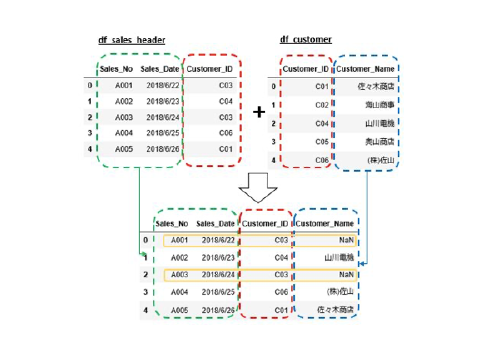

黄色で囲ったところが内部結合との違いになります。

df_sales_headerとdf_customerを結合キーCustomer_IDで左外部結合させた場合、Customer_IDにかかわらず左側のdf_sales_headerの行は全て出力されます。
ここでは結合キーが一致していないCustomer_IDがC03の行も表示されています。
df_customerにはCustomer_IDがC03の行は存在しないので結合後のCustomer_Nameは欠損値を示すNaN(Not a number)と表示されています。

2. 右外部結合（Right outerJoin)

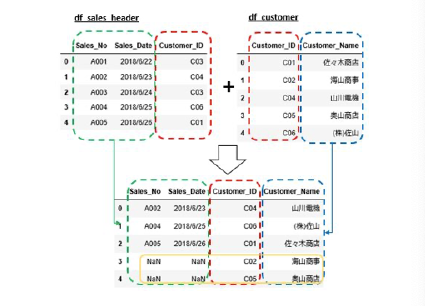

こちらも黄色で囲ったところが内部結合との違いになります。
df_sales_headerとdf_customerを結合キーCustomer_IDで右側結合させた場合Custome_IDにかかわらず右側のdf_customerの行は全て出力されます。
ここでは結合キーが一致していないCustomer_IDがC02、C-5の行も表示されています。df_sales_headerにはCustomer_IDがC02、C05の行は存在していないので結合後のCustomer_No、Sales_Dateは欠損値を示すNaN(Not a number)と表示されています。

3. 完全外部結合（Full outer Join)

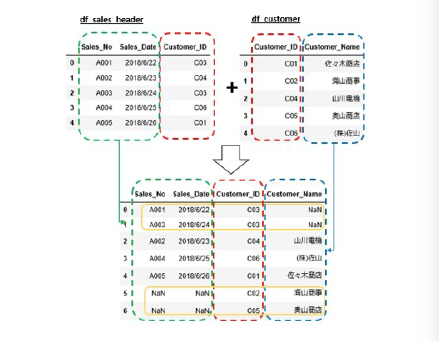

同様に黄色で囲ったところが内部結合との違いになります。
df_sales_headerとdf_customerを結合キーCustomer_IDで完全外部結合させた場合Customer_IDにかかわらず両方のDataFrameの行は全て出力されます。
ここでは結合キーが一致していないCsutomer_IDがC03、C02、C05の行も表示されています。
結合キーがそれぞれのDataFrameに存在しない行の項目の値は欠損値を示すNaN(Not a number)と表示されています。

それでは外部結合の実際の例を見ていきましょう。

最初は左外部結合からです。df_sales_headerとdf_customerを左外部結合します。
引数howに対して"left"を渡します。

In [86]:
pd.merge(df_sales_header, df_customer, how = "left", on = "Customer_ID")

,Sales_No,Sales_Date,Customer_ID,Sales_Org,Customer_Name
0,A001,2018/6/22,C03,Q01,NaN
1,A002,2018/6/23,C04,Q02,山川電機
2,A003,2018/6/24,C09,Q01,NaN
3,A004,2018/6/25,C01,Q03,佐々木商店
4,A005,2018/6/26,C01,Q01,佐々木商店
5,A006,2018/6/27,C02,Q03,海山商事
6,A007,2018/6/28,C02,Q01,海山商事
7,A008,2018/7/5,C03,Q02,NaN
8,A009,2018/7/24,C04,Q01,山川電機
9,A010,2018/7/12,C04,Q01,山川電機


次はdf_sales_headerとdf_customerを右外部結合します。引数howに対して"right"を渡します。

In [87]:
pd.merge(df_sales_header, df_customer, how = "right", on = "Customer_ID")

,Sales_No,Sales_Date,Customer_ID,Sales_Org,Customer_Name
0,A002,2018/6/23,C04,Q02,山川電機
1,A009,2018/7/24,C04,Q01,山川電機
2,A010,2018/7/12,C04,Q01,山川電機
3,A004,2018/6/25,C01,Q03,佐々木商店
4,A005,2018/6/26,C01,Q01,佐々木商店
5,A006,2018/6/27,C02,Q03,海山商事
6,A007,2018/6/28,C02,Q01,海山商事
7,NaN,NaN,C05,NaN,奥山商店
8,NaN,NaN,C06,NaN,(株)佐山


最後はdf_sales_headerとdf_customerを完全外部結合します。引数howに対して"outer"を渡します。

In [88]:
pd.merge(df_sales_header, df_customer, how = "outer", on = "Customer_ID")

,Sales_No,Sales_Date,Customer_ID,Sales_Org,Customer_Name
0,A001,2018/6/22,C03,Q01,NaN
1,A008,2018/7/5,C03,Q02,NaN
2,A002,2018/6/23,C04,Q02,山川電機
3,A009,2018/7/24,C04,Q01,山川電機
4,A010,2018/7/12,C04,Q01,山川電機
5,A003,2018/6/24,C09,Q01,NaN
6,A004,2018/6/25,C01,Q03,佐々木商店
7,A005,2018/6/26,C01,Q01,佐々木商店
8,A006,2018/6/27,C02,Q03,海山商事
9,A007,2018/6/28,C02,Q01,海山商事


3-12 Pandas - ピボットテーブルの作成
--------------------------------------------

ピボットテーブルはデータの集計や分析において大変重要なツールになります。ピボットテーブルでは縦軸と横軸集計値を選択しクロステーブルで集計結果をすることにより様々な角度からデータを確認することができます。

次のピボトテーブルでは縦軸に顧客、横軸に商品、集計値として売上を表示しています。

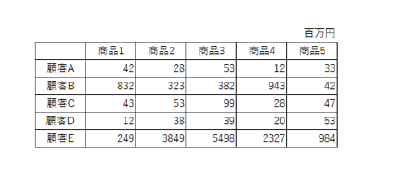

このようにクロステーブルで結果を表示することによってどの顧客のどの商品が売れているか売れていないかを視覚的に確認することができます。

それでは実際にピボットテーブルを作成していきましょう。
ここでは売上ヘッダ情報、売上明細情報を元にピボットテーブルを作成し、販売組織、顧客、製品ごとの売り上げを分析する例を見ていくことにしましょう。
まずは事前準備として必要なデータをCSVファイルから読み込みます。

最初に売り上げヘッダ情報が格納されているCSVファイル"T_SalesHeader_pv.csv"をDataFrame df_sales_headerに読み込みます。

In [89]:
df_sales_header = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/T_Sales_Header_pv.csv", index_col = ["Sales_No"])

df_sales_header

,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,
A001,2018/6/22,C01,Q01
A002,2018/6/23,C02,Q02
A003,2018/6/24,C03,Q01
A004,2018/6/25,C01,Q03
A005,2018/6/26,C02,Q01


次に売り上げ明細情報が格納されいているCSVファイル"T_Sales_Item_pv.csv"をdf_sales_itemに読み込みます。

In [90]:
df_sales_Item = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/T_Sales_Item_pv.csv", index_col = ["Sales_No", "Sales_Item_No"])

df_sales_item

Product_ID  Qty  Amount   Tax
Sales_No Sales_Item_No                              
A001     1                   P001    1    7000   560
         2                   P002    2    7700   616
A002     1                   P003    1    6800   544
         2                   P006    4   35000  2800
A003     1                   P005    3   30000  2400
A004     1                   P002    5    7700   616
         2                   P003    1    6800   544
         3                   P008    1   42000  3360
         4                   P005    2   30000  2400
         5                   P010    1   12000   960
A005     1                   P003    1    6800   544
         2                   P005    3   30000  2400
         3                   P006    2   35000  2800
A006     1                   P001    3    7000   560
         2                   P006    2   35000  2800
         3                   P004    2   31000  2480
         4                   P008    1   42000  3360
         5                   P010    1   12000   960
         6                   P002    1    7700   616
A007     1                   P006    1   35000  2800
A008     1                   P010    2   12000   960
         2                   P007    2   44000  3520
         3                   P003    2    6800   544
A009     1                   P002    1    7700   616
         2                   P010    1   12000   960
A010     1                   P009    1   38000  3040

そして作成した２つのDataFrameを前の章で学んだ左外部結合で結合しdf_salesに格納します。

In [91]:
df_sales = pd.merge(df_sales_item, df_sales, how = "left", on = "Sales_No")

df_sales.head()

,Product_ID,Qty,Amount,Tax,Sales_Date,Customer_ID,Sales_Org
Sales_No,,,,,,,
A001,P001,1,7000,560,2018/6/22,C03,Q01
A001,P002,2,7700,616,2018/6/22,C03,Q01
A002,P003,1,6800,544,2018/6/23,C04,Q02
A002,P006,4,35000,2800,2018/6/23,C04,Q02
A003,P005,3,30000,2400,2018/6/24,C09,Q01


このようにして作成したdf_salesを確認するとマスタの値がコードで示されており、このままピボットテーブルを作成しても分析には苦労しそうです。
そこでマスタの値も読み込み名称を表示するようにしましょう。
Customer、Product、Sales、Organizationの３つのマスタを順に読み込んでいきます。

まず最初にCSVファイル"M_Customer.csv"を読み込みdf_customerに格納します。

In [92]:
df_customer = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/M_Customer.csv", index_col = ["Customer_ID"], encoding = "SHIFT-JIS")

df_customer.head()

,Customer_Name
Customer_ID,
C01,佐々木商店
C02,海山商事
C03,田中商店
C04,山川電機
C05,奥山商店


次にCSVファイル"M_Product_pv.csv"を読み込みdf_productに格納します。

In [93]:
df_product = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/M_Product_pv.csv", index_col = ["Product_ID"], encoding = "SHIFT-JIS")

df_product

,Product_Name
Product_ID,
P001,iPod shuffle
P002,iPhone 6
P003,iPod touch


最後にCSVファイル"M_SalesOrganization.csv"を読み込みdf_sales_orgに格納します。

In [94]:
df_sales_org = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/M_Salesorganization.csv", index_col = ["Sales_Org"], encoding = "SHIFT-JIS")

df_sales_org

,Sales_Org_Name
Sales_Org,
Q01,関東営業本部
Q02,西日本営業本部
Q03,九州営業本部


df_salesに対してこれら読み込んだマスタを左外部結合します。

In [95]:
df_sales = pd.merge(df_sales, df_customer, how = "left", on = "Customer_ID")

df_sales = pd.merge(df_sales, df_product, how = "left", on = "Product_ID")

df_sales = pd.merge(df_sales, df_sales_org, how = "left", on = "Sales_Org")

df_sales.head()

,Product_ID,Qty,Amount,Tax,Sales_Date,Customer_ID,Sales_Org,Customer_Name,Product_Name,Sales_Org_Name
0,P001,1,7000,560,2018/6/22,C03,Q01,田中商店,iPod shuffle,関東営業本部
1,P002,2,7700,616,2018/6/22,C03,Q01,田中商店,iPhone 6,関東営業本部
2,P003,1,6800,544,2018/6/23,C04,Q02,山川電機,iPod touch,西日本営業本部
3,P006,4,35000,2800,2018/6/23,C04,Q02,山川電機,NaN,西日本営業本部
4,P005,3,30000,2400,2018/6/24,C09,Q01,内山商事,NaN,関東営業本部


このようにしてdf_salesに対してマスタも結合し名称も表示されるようになりました。以上で準備が終わり、いよいよピボットテーブルの作成にとりかかります。

ピボットテーブルの作成
--------------------------------------------

先ほど準備したDataFrame df_salesを元にピボットテーブルを作成していきます。

DataFrameのJoinの結合にはmergeを使います。
２つのDataFrameをそれぞれdf1、df2とすると以下のように記述します。

df1.pivot_table(values = "集計値", index = "gyou", columns = "列")

引数valuesには、集計する値が格納された項目を指定します。
また引数indexには行をcolumnsには列に表示される項目を指定します。
項目が複数ある場合はlistで指定します。

例えばindexに指定する項目が１つの場合index = "項目１"と指定し、２つ以上の場合index = ["項目1", "項目2"、・・・]というようにlistで指定します。

それではピボットテーブルを作成していきます。まずは顧客、製品ごとの売り上げを見ていきましょう。集計値には"Amount"、行には"Customer_Name"、列には"Product_name"を指定します。

In [96]:
df_sales.pivot_table(values = "Amount", index = "Customer_Name", columns = "Product_Name")

Product_Name,iPhone 6,iPod shuffle,iPod touch
Customer_Name,,,
佐々木商店,7700.0,NaN,6800.0
山川電機,7700.0,NaN,6800.0
海山商事,7700.0,7000.0,NaN
田中商店,7700.0,7000.0,6800.0


このようにして作成されたピボットテーブルから顧客、製品ごとの売り上げが確認でき、例えばiPod shuffleは佐々木商店によく売れている、海山商事に販売している商品の中ではiPhone 6が売り上げが高いなどがわかります。

さらに分析軸を増やし、行に"Sales_Org"を追加してみましょう。
引数indexにはlistで["Sales_Org_Name", "Customer_Name"]を渡します。

In [97]:
df_sales.pivot_table(values = "Amount", index = ["Sales_Org_Name", "Customer_Name"], columns = "Product_Name")

Product_Name                  iPhone 6  iPod shuffle  iPod touch
Sales_Org_Name Customer_Name                                    
九州営業本部         佐々木商店            7700.0           NaN      6800.0
               海山商事             7700.0        7000.0         NaN
西日本営業本部        山川電機                NaN           NaN      6800.0
               田中商店                NaN           NaN      6800.0
関東営業本部         佐々木商店               NaN           NaN      6800.0
               山川電機             7700.0           NaN         NaN
               田中商店             7700.0        7000.0         NaN

このように作成されたピボットテーブルから販売組織、顧客、製品ごとの売り上げが確認できるようになりました。
このようにしてピボットテーブルでは行や列に項目を増やしたり集計値を変えてみたりして様々な切り口からデータを分析することができます。

3-13 Pandas - 時系列データの取り扱い
--------------------------------------------

この章では時系列データの集計方法について学んでいきましょう。
日々の売り上げデータを月、四半期、年度単位に集計する方法を確認します。

datatimeによる日付型データの作成
--------------------------------------------

年、月、日などを示した数値を日付型に変換するには、次のdatetimeを利用します。

datetime(year, month, day,[hour, minute, second])

引数にはyear、month、day、hour、minute、secondを指定します。

hour、minute、secondは省略することもできます。

まずは日付型のデータを作成します。年、月、日をそれぞれ変数year_1、month_1、day_1に格納します。

そしてその変数をdatetimeに渡し日付型に変換します。

date_1の内容を確認するとdatetime.datetime(2018, 1, 23, 0, 0)と表示され日付型のデータが格納されていることがわかります。

In [98]:
from datetime import datetime

year_1 = 2018

month_1 = 1

day_1 = 23

hour_1 = 17

minute_1 = 58

second_1 = 36

date_1 = datetime(year_1, month_1, day_1)

date_1

datetime.datetime(2018, 1, 23, 0, 0)

先ほどの実行結果から変数date_1にはdatetime型で値が格納されていることがわかりますが、変数の型を確認できるtypeを使ってもdate_1に日付型の値が格納されていることが確認できます。

In [99]:
type(date_1)

datetime.datetime

次に引数に先ほどは省略しましたが、今度は時、分、秒を格納した変数hour_1、minute_1、second_1も渡してみましょう。

In [100]:
date_2 = datetime(year_1, month_1, day_1, hour_1, minute_1, second_1)

date_2

datetime.datetime(2018, 1, 23, 17, 58, 36)

次に日付ごとの売り上げを格納したDataFrameを作成しインデックスに日付型のデータを指定していきます。
これらdatetimeで作成した日付型のデータを元にDataFrameに対して日付型のインデックスを作成してみます。
最初にdatetime絵日付型のデータをいくつかリストに格納し変数date_listに格納します。
日付型インデックス作成にはDatetimeIndexを利用します。

In [101]:
date_list = [datetime(2018, 10, 1),
                     datetime(2018, 10, 2),
                    datetime(2018, 10, 3),
                    datetime(2018, 10, 4),
                    datetime(2018, 10, 5)]

date_index = pd.DatetimeIndex(date_list)

次に売り上げを格納したリストを変数sales_listに格納します。

In [102]:
sales_list = [64000, 32000, 28000, 78000, 31800]

これらsales_list、date_indexを元にDataFrameを作成します。

In [103]:
df1 = pd.DataFrame(data = sales_list, index = date_index, columns = ["Daily Sales"])

df1

,Daily Sales
2018-10-01,64000
2018-10-02,32000
2018-10-03,28000
2018-10-04,78000
2018-10-05,31800


日付型インデックスの設定とlocによる期間指定
--------------------------------------------

次にCSVファイルからの読み込み時に日付型インデックスを設定する方法についてみていきましょう。
日付型の項目を含んだCSVをread_csvで読み込む際にはインデックスの指定を引数index_colで行い合わせてparse_datesにTrueを指定します。
そうすることによりindex_colで指定された項目は日付型のインデックスとなります。

実際の例としてある商品の日々の売り上げが格納されたCSVファイル"T_Daily_Sales.csv"からデータを読み込み、日付型のインデックスを設定してみます。

このCSVファイルから取得した日時売り上げデータには日付型の列"Sales_Date"、その日の売り上げを格納した列"Sales_amount"の２つの列があります。

In [104]:
df_daily_sales = pd.read_csv("~/Documents/書籍関連/Python3/pandas_manual/T_Daily_Sales.csv", index_col = ["Sales_Date"], parse_dates = True)

df_daily_sales.head()

,Sales_Amount
Sales_Date,
2015-01-01,396000
2015-01-02,398000
2015-01-03,403000
2015-01-04,407000
2015-01-05,406000


先ほど読み込んだCSVファイルの最後のデータもtailにて確認します。
2018/06/11までのデータが格納されているようです。

In [105]:
df_daily_sales.tail()

,Sales_Amount
Sales_Date,
2018-06-07,1138000
2018-06-08,1145000
2018-06-09,1140000
2018-06-10,1140000
2018-06-11,1131000


日付ごとの売り上げを格納したDataFrame df_daily_salesからlocを利用して一定期間のデータを抽出してみましょう。

ここでは2015/1/2から2015/1/4までのデータを抽出しています。

In [106]:
df_daily_sales.loc["2015-01-02": "2015-01-04"]

,Sales_Amount
Sales_Date,
2015-01-02,398000
2015-01-03,403000
2015-01-04,407000


週・月・年・年度単位の集計（平均）
--------------------------------------------

次に週、月、年、年度単位の集計を実施していきます。時系列のデータをある期間でグルーピングし直す場合resampleを使います。

DataFrame.resample(rule = 期間)

DataFrameには時系列のデータを格納します。また引数ruleではグルーピングし直す期間を指定します。
期間は次のように記号で指定します。

A: 年
M:　月
Q: 四半期
W: 週

このようにresampleを利用して時系列のデータをグルーピングし直しその結果を元に平均、最大値などを求めていきます。
例えば平均を求める場合以下のようにresampleの後に.mean()をつけて平均を求めます。

DataFrame.resample(rule = 期間).mean()

最初に先ほどCSVファイルから取得した日次売り上げデータを元に、年ごとの売り上げの平均を求めてみましょう。
resampleへの引数ruleには"A"（年)を渡します。
そして年単位でグルーピングしたデータに対してmeanで平均を算出します。
その計算結果の小数点以下の数をround()で整数に丸めています。

In [107]:
round(df_daily_sales.resample(rule = "A").mean())

,Sales_Amount
Sales_Date,
2015-12-31,538910.0
2016-12-31,734309.0
2017-12-31,1090200.0
2018-12-31,1036494.0


月ごとの平均を求める場合はresampleへの引数ruleには"M"（月)を渡します。

In [108]:
round(df_daily_sales.resample(rule = "M").mean()).head()

,Sales_Amount
Sales_Date,
2015-01-31,430258.0
2015-02-28,535071.0
2015-03-31,576194.0
2015-04-30,546833.0
2015-05-31,577032.0


同様に四半期の平均を求める場合resampleへの引数ruleには"Q"(四半期)を渡します。

In [109]:
round(df_daily_sales.resample(rule = "Q").mean()).head()

,Sales_Amount
Sales_Date,
2015-03-31,513133.0
2015-06-30,593615.0
2015-09-30,571924.0
2015-12-31,477000.0
2016-03-31,537934.0


最後に週の平均を算出する場合resampleへの引数ruleには"W"(週)を渡します。

In [110]:
round(df_daily_sales.resample(rule = "W").mean()).head()

,Sales_Amount
Sales_Date,
2015-01-04,401000.0
2015-01-11,407571.0
2015-01-18,417571.0
2015-01-25,442143.0
2015-02-01,478143.0


これまで日時の売り上げデータを元に年、月、四半期、週ごとの平均を求めてきましたが会社ごとに異なる会計年度単位での集計が必要な場合、どのように実現していけばいいでしょうか。
特に日本では４月〜３月決算の会社が多く、このように会計年度単位の期間で集計を求められるケースもよくあります。
この会計年度単位の集計にはちょっとしたテクニックが必要になります。
これについては後で解説していきます。

合計、最大値の取得方法
--------------------------------------------

一方で集計方法については平均以外についてもみていきましょう。
次に合計、最大値の集計の例を確認します。

月の合計をする場合に引数ruleに"M"(月)を指定し、その結果をsumで合計します。

In [111]:
df_daily_sales.resample(rule = "M").sum().head()

,Sales_Amount
Sales_Date,
2015-01-31,13338000
2015-02-28,14982000
2015-03-31,17862000
2015-04-30,16405000
2015-05-31,17888000


また、月の最大値を取得する場合はmaxにて最大値を取得することができます。

In [112]:
df_daily_sales.resample(rule = "M").max().head()

,Sales_Amount
Sales_Date,
2015-01-31,491000
2015-02-28,592000
2015-03-31,613000
2015-04-30,566000
2015-05-31,600000


shiftによる日付の操作
--------------------------------------------

時系列のデータにおいてはデータの時間軸を前や後ろにずらして集計をする必要があるケースが生じます。
その場合shiftを利用します。

DataFrame.shift(ずらす数[, freq = ずらす単位])

DataFrameには時系列のデータを格納しshiftで時間軸をずらしていきます。
引数にはずらす数を指定し、もう１つの引数freqでずらす単位を指定します。
freqの指定は任意で、省略すると日単位となります。
freqに指定する記号は先ほどと同じつぎのようなものになります。

A: 年
M: 月
Q: 四半期
W: 週

まずは先ほどの日次売り上げのデータを再度確認します。
最初の５件を表示してみましょう。

In [113]:
df_daily_sales.head()

,Sales_Amount
Sales_Date,
2015-01-01,396000
2015-01-02,398000
2015-01-03,403000
2015-01-04,407000
2015-01-05,406000


１日前へずらす場合shiftへ引数に１を渡します。

In [114]:
df_daily_sales.shift(1).head()

,Sales_Amount
Sales_Date,
2015-01-01,NaN
2015-01-02,396000.0
2015-01-03,398000.0
2015-01-04,403000.0
2015-01-05,407000.0


１日後ろへずらす場合shiftへ引数-1を渡します。

In [115]:
df_daily_sales.shift(-1).head()

,Sales_Amount
Sales_Date,
2015-01-01,398000.0
2015-01-02,403000.0
2015-01-03,407000.0
2015-01-04,406000.0
2015-01-05,408000.0


また引数freqでどの単位で日付をずらすかを指定することができます。
"M"を指定すると月単位で日付をずらすことができます。
1か月後ろへずらす場合はshiftの引数に-1を指定しfreqへ"M"(月)を指定します。

In [116]:
df_daily_sales.shift(-1).head()

,Sales_Amount
Sales_Date,
2015-01-01,398000.0
2015-01-02,403000.0
2015-01-03,407000.0
2015-01-04,406000.0
2015-01-05,408000.0


また引数freqで、どの単位で日付をずらすかを指定することができます。
"M"を指定すると月単位で日付をずらすことができます。
1か月後ろへずらす場合はshiftの引数に-1を指定しfreqへ"M"(月)を指定します。

In [117]:
df_daily_sales.shift(-1, freq = "M").head()

,Sales_Amount
Sales_Date,
2014-12-31,396000
2014-12-31,398000
2014-12-31,403000
2014-12-31,407000
2014-12-31,406000


会計年度の集計
--------------------------------------------

ここまで学習したことの応用事例として多くの日本企業が採用している４月から３月までを１つの会計年度として年度ごとの売り上げを集計する例を確認指定いきましょう。

まずは月単位で日々の売り上げを集計します。
resampleの引数ruleに"M"を指定して月単位にまとめたものをsumで合計しdf_monthley_salesに格納します。
そしてdf_monthly_salesの最初の１５件をheadで確認すると日付は2015/1/31から始まっています。

In [118]:
df_monthly_sales = df_daily_sales.resample(rule = "M").sum()

df_monthly_sales.head(15)

,Sales_Amount
Sales_Date,
2015-01-31,13338000
2015-02-28,14982000
2015-03-31,17862000
2015-04-30,16405000
2015-05-31,17888000
2015-06-30,19726000
2015-07-31,19726000
2015-08-31,17524000
2015-09-30,15367000


次につい単位で集計したものを3ヶ月後ろへずらしていき、その結果をdf_monthly_sales_shiftに格納します。
df_monthly_sales_shiftの最初の１５件を確認すると、日付が2014/10/31から始まり、３ヶ月後へずれいていることがわかります。

In [119]:
df_monthly_sales_shift = df_monthly_sales.shift(-3, freq = "M")

df_monthly_sales_shift.head(15)

,Sales_Amount
Sales_Date,
2014-10-31,13338000
2014-11-30,14982000
2014-12-31,17862000
2015-01-31,16405000
2015-02-28,17888000
2015-03-31,19726000
2015-04-30,19726000
2015-05-31,17524000
2015-06-30,15367000


このように３ヶ月後ろへシフトされたデータを元にresampleで年間集計します。
引数ruleに対して"A"(年)を渡しsumで合計します。
すると会計年度に基づき集計することができます。

In [120]:
df_monthly_sales_shift.resample(rule = "A").sum()

,Sales_Amount
Sales_Date,
2014-12-31,46182000
2015-12-31,199472000
2016-12-31,320638000
2017-12-31,385471000
2018-12-31,79531000


移動平均の算出
--------------------------------------------

最後に移動平均の算出方法について確認していきましょう。
移動平均の算出には日付を固定して値だけをずらすrolllingを利用します。
rollingの引数には何行分ずらずのかを指定します。それではここではrollingで１０行値をずらしその結果をmeanで平均をとります。こうすることにより１０日の移動平均を算出することができます。

In [121]:
df_daily_sales.rolling(10).mean().head(15)

,Sales_Amount
Sales_Date,
2015-01-01,NaN
2015-01-02,NaN
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
2015-01-09,NaN
